<a href="https://colab.research.google.com/github/FelipeMoraes03/aprendizado_supervisionado/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

#Coleta e tratamento dos dados

In [96]:
#Coletando os dados
cvd = pd.read_csv('/covid_dataset.csv')

In [97]:
#Substituindo os valores por inteiros
cvd = cvd.replace({"Yes": 1, "No": 0})

#Salvando o DataFrame modificado em um novo arquivo CSV
cvd.to_csv("covid_new.csv", index=False)

In [98]:
#Coletando os dados do novo dataset
cvd = pd.read_csv('covid_new.csv')

In [99]:
# Selecionando os valores
values = cvd.iloc[:, :-1].values

# Selecionando a label
labels = cvd.iloc[:, -1:].values

In [100]:
#Dividindo o conjunto em treino e teste
values_train, values_test, labels_train, labels_test = train_test_split(values, labels, test_size=0.3)


#Decision Tree com Criterion **Gini**

In [102]:
#Vai guardar qual foi a melhor ávore de decisão
best_tree = {
    'criterion': '',
    'depth': '',
    'accuracy': 0
}

Accuracy com no máx 1 de profundidade: 82.34%


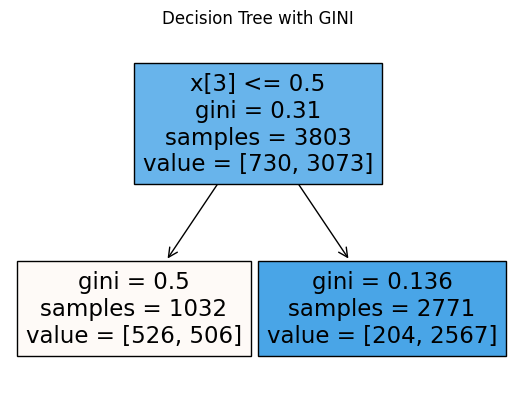

Accuracy com no máx 2 de profundidade: 90.07%


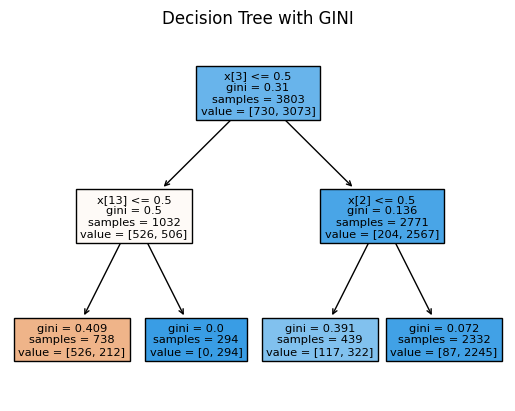

Accuracy com no máx 3 de profundidade: 93.19%


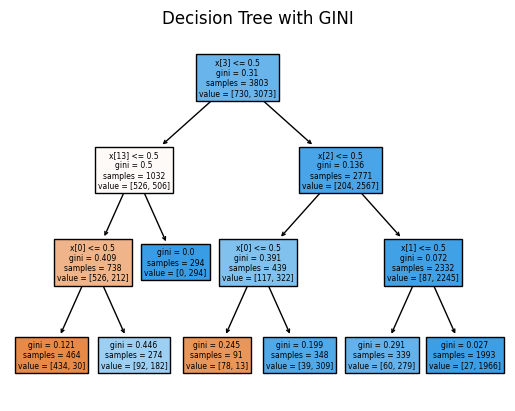

Accuracy com no máx 4 de profundidade: 94.3%


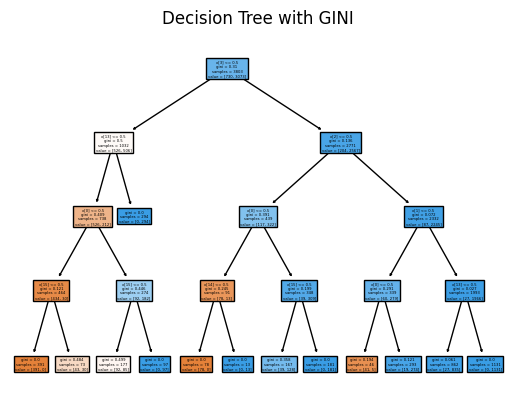

Accuracy com no máx 5 de profundidade: 96.32%


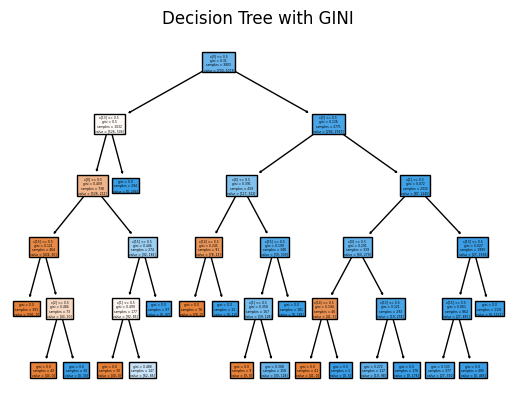

Accuracy com no máx 6 de profundidade: 97.12%


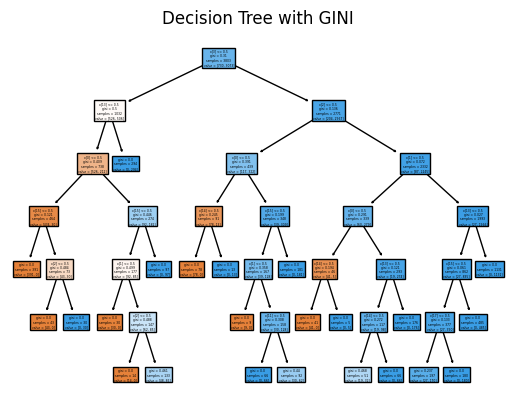

Accuracy com no máx 7 de profundidade: 97.0%


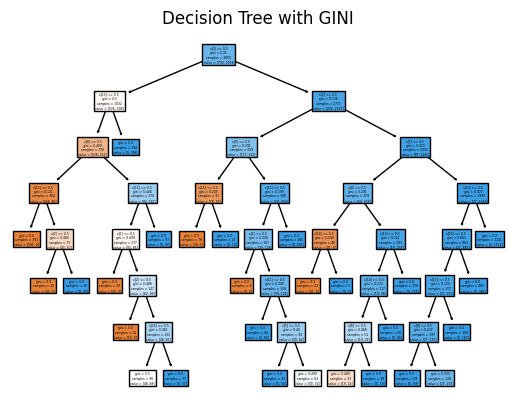

Accuracy com no máx 8 de profundidade: 97.3%


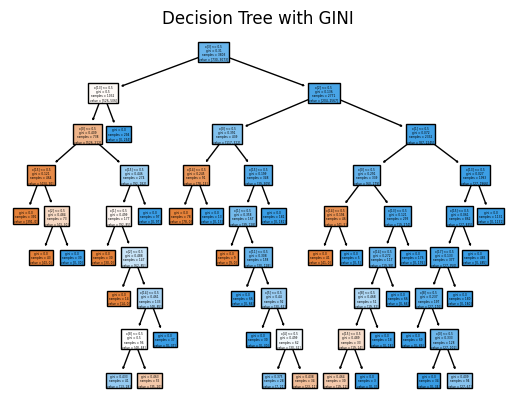

Accuracy com no máx 9 de profundidade: 97.98%


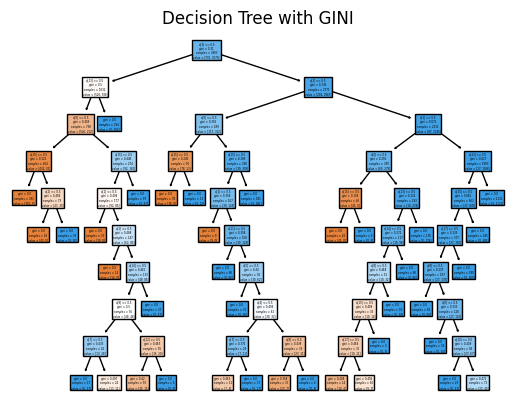

Accuracy com no máx 10 de profundidade: 98.16%


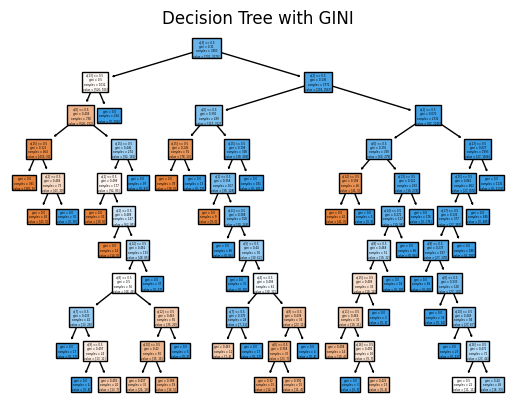

In [105]:
for i in range(1, 11):
  #Treinando o modelo com os parâmetros de treino
  decision_tree = DecisionTreeClassifier(criterion = "gini", max_depth = i)
  decision_tree.fit(values_train, labels_train)

  #Utilizando o modelo treinado para prever as labels do conjunto de testes
  labels_prediction = decision_tree.predict(values_test)

  #Verificando a accuracy
  accuracy = accuracy_score(labels_test, labels_prediction)

  #Imprimindo a accuracy do modelo
  print(f"Accuracy com no máx {i} de profundidade: {round((accuracy*100), 2)}%")

  #Plotando o gráfico da decision tree
  plot_tree(decision_tree, filled=True)
  plt.title("Decision Tree with GINI")
  plt.show()

  #Atualiza a melhor decision tree
  if (accuracy > best_tree['accuracy']):
    best_tree['criterion'] = "gini"
    best_tree['depth'] = i
    best_tree['accuracy'] = round(accuracy, 4)

#Decision Tree com Criterion **Log Loss**

Accuracy com no máx 1 de profundidade: 80.32%


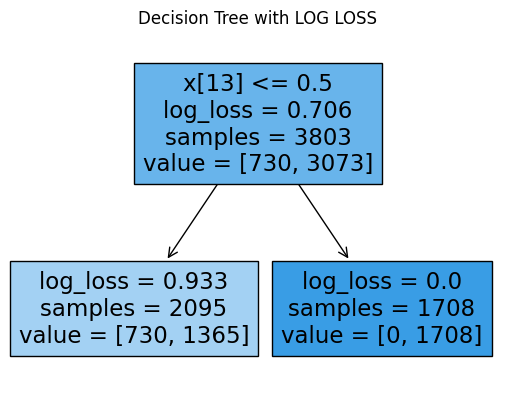

Accuracy com no máx 2 de profundidade: 89.15%


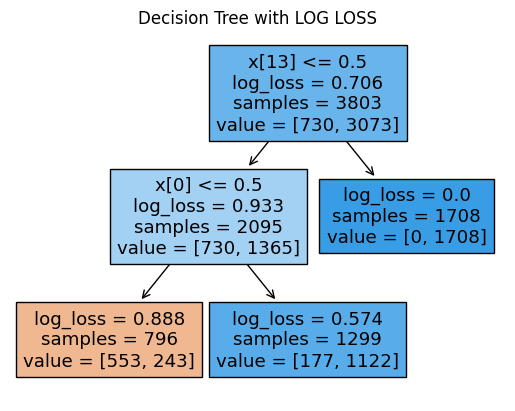

Accuracy com no máx 3 de profundidade: 91.66%


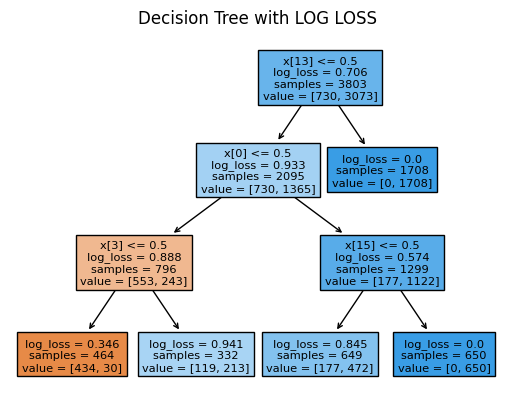

Accuracy com no máx 4 de profundidade: 91.97%


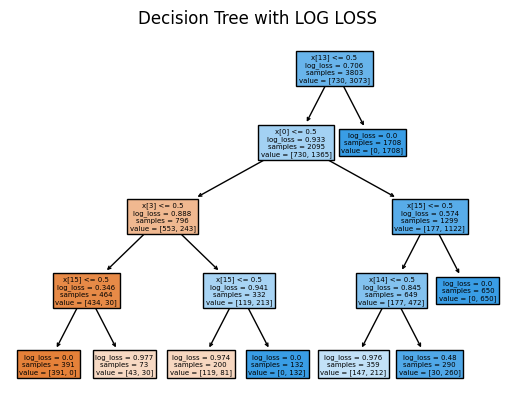

Accuracy com no máx 5 de profundidade: 95.59%


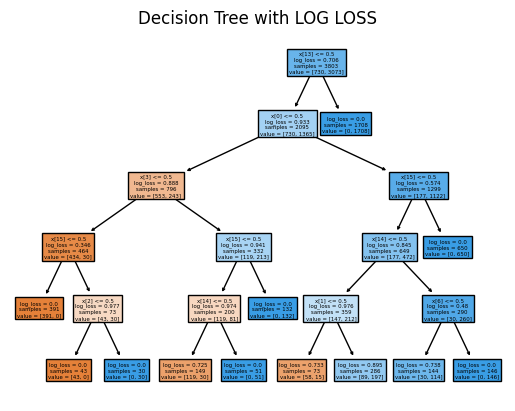

Accuracy com no máx 6 de profundidade: 95.59%


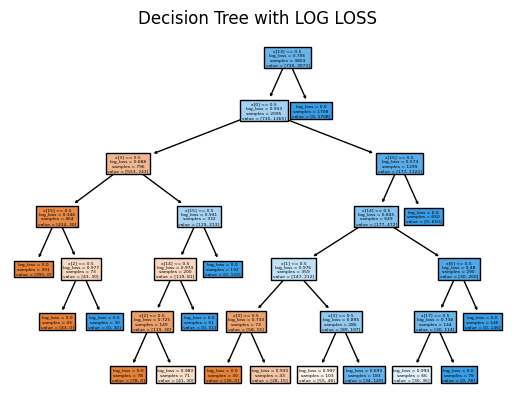

Accuracy com no máx 7 de profundidade: 97.61%


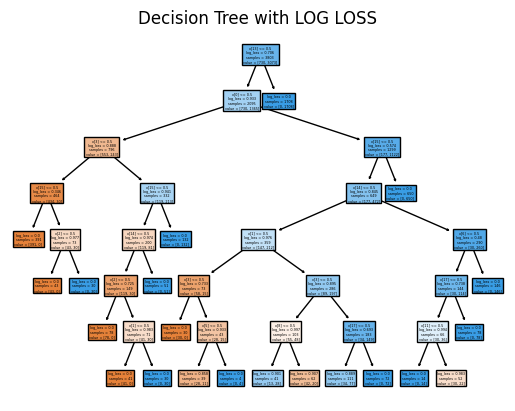

Accuracy com no máx 8 de profundidade: 97.73%


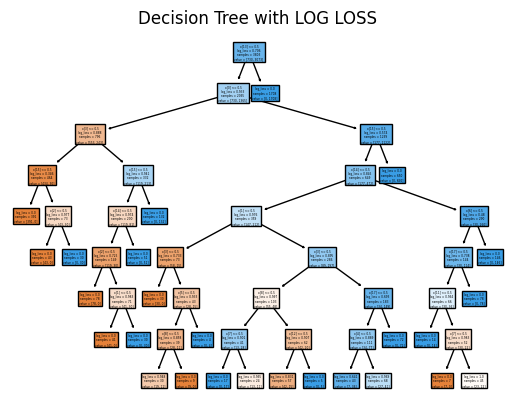

Accuracy com no máx 9 de profundidade: 98.04%


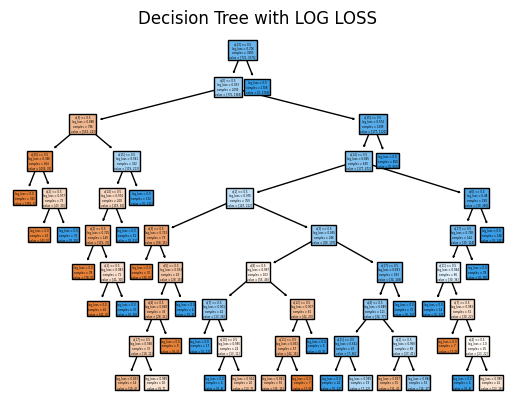

Accuracy com no máx 10 de profundidade: 98.41%


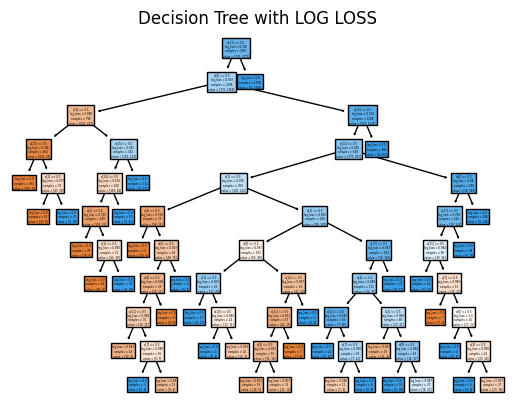

In [107]:
for i in range(1, 11):
  #Treinando o modelo com os parâmetros de treino
  decision_tree = DecisionTreeClassifier(criterion = "log_loss", max_depth = i)
  decision_tree.fit(values_train, labels_train)

  #Utilizando o modelo treinado para prever as labels do conjunto de testes
  labels_prediction = decision_tree.predict(values_test)

  #Verificando a accuracy
  accuracy = accuracy_score(labels_test, labels_prediction)

  # Imprimir a acurácia do modelo
  print(f"Accuracy com no máx {i} de profundidade: {round((accuracy*100), 2)}%")

  #Plotando o gráfico da decision tree
  plot_tree(decision_tree, filled=True)
  plt.title("Decision Tree with LOG LOSS")
  plt.show()

  #Atualiza a melhor decision tree
  if (accuracy > best_tree['accuracy']):
    best_tree['criterion'] = "log_loss"
    best_tree['depth'] = i
    best_tree['accuracy'] = round(accuracy, 4)

#Decision Tree com Criterion **Entropy**

Accuracy com no máx 1 de profundidade: 80.32%


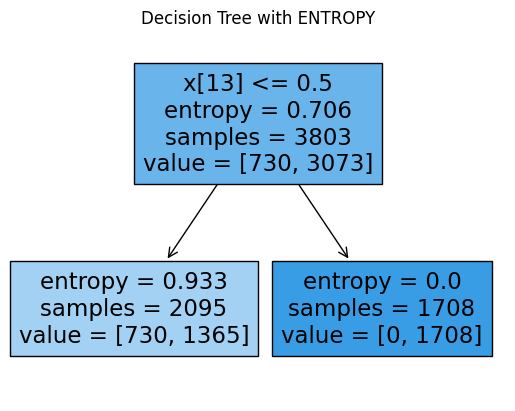

Accuracy com no máx 2 de profundidade: 89.15%


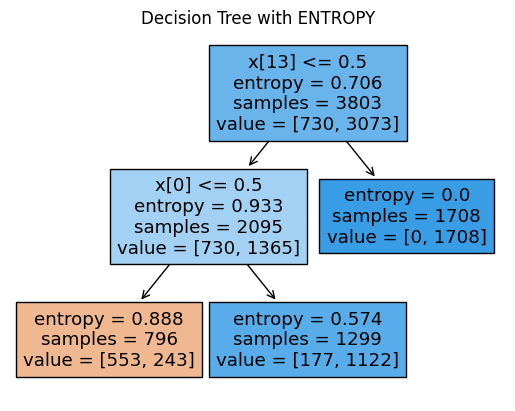

Accuracy com no máx 3 de profundidade: 91.66%


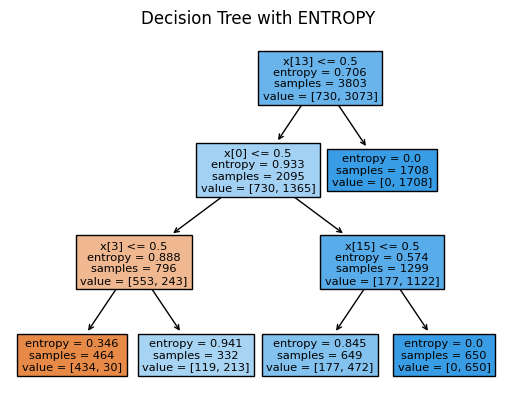

Accuracy com no máx 4 de profundidade: 91.97%


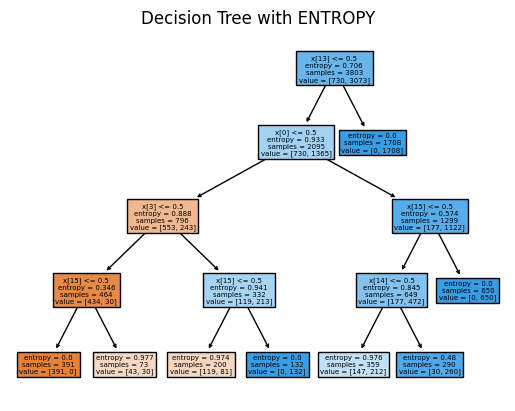

Accuracy com no máx 5 de profundidade: 95.59%


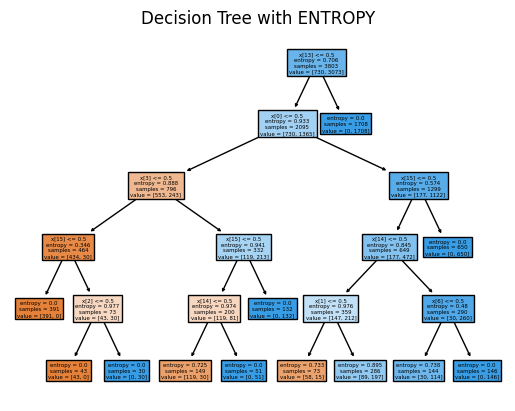

Accuracy com no máx 6 de profundidade: 95.59%


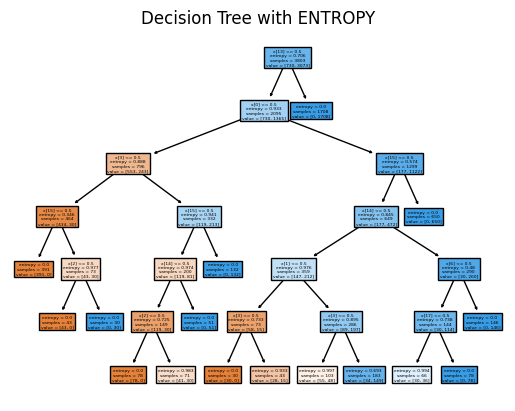

Accuracy com no máx 7 de profundidade: 97.61%


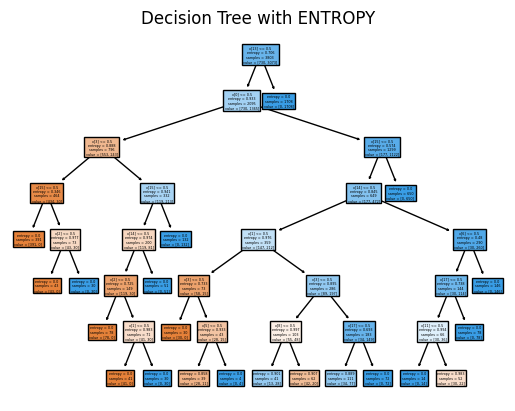

Accuracy com no máx 8 de profundidade: 97.73%


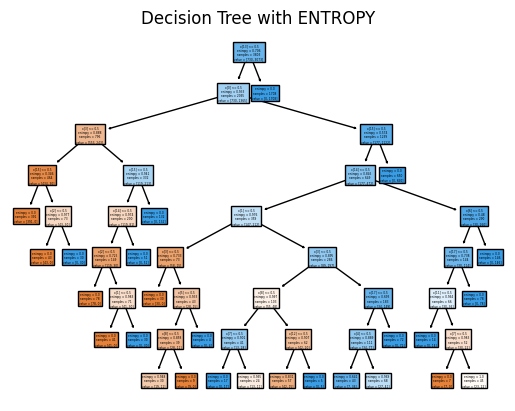

Accuracy com no máx 9 de profundidade: 98.1%


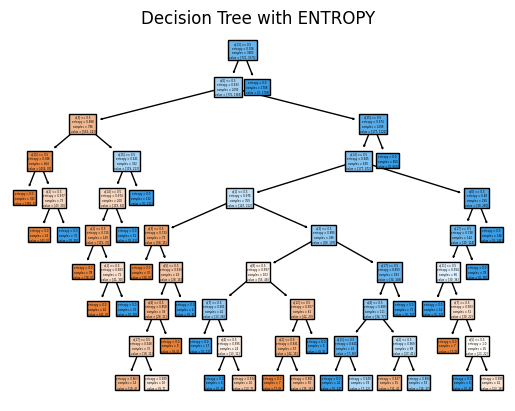

Accuracy com no máx 10 de profundidade: 98.41%


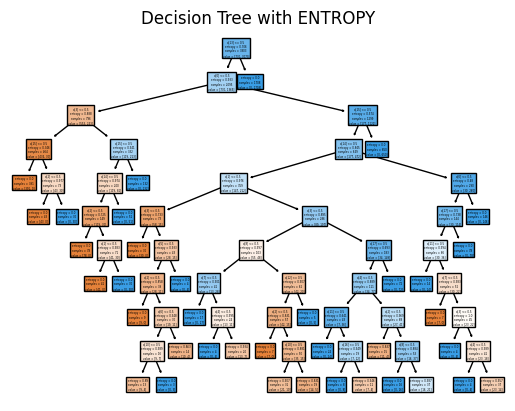

In [106]:
for i in range(1, 11):
  #Treinando o modelo com os parâmetros de treino
  decision_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
  decision_tree.fit(values_train, labels_train)

  #Utilizando o modelo treinado para prever as labels do conjunto de testes
  labels_prediction = decision_tree.predict(values_test)

  #Verificando a accuracy
  accuracy = accuracy_score(labels_test, labels_prediction)

  # Imprimir a acurácia do modelo
  print(f"Accuracy com no máx {i} de profundidade: {round((accuracy*100), 2)}%")

  #Plotando o gráfico da decision tree
  plot_tree(decision_tree, filled=True)
  plt.title("Decision Tree with ENTROPY")
  plt.show()

  #Atualiza a melhor decision tree
  if (accuracy > best_tree['accuracy']):
    best_tree['criterion'] = "entropy"
    best_tree['depth'] = i
    best_tree['accuracy'] = round(accuracy, 4)

#Melhor modelo de árvore de decisão para nosso dataset 

In [108]:
print(best_tree)

{'criterion': 'entropy', 'depth': 10, 'accuracy': 0.9841}
